In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt


関数
  \begin{align*}
    f(x) = \sqrt{x^2+\exp(x^2)} + \cos(x^2+\exp(x^2))
  \end{align*}
の微分
  \begin{align*}
    \frac{d f}{d x} &= \frac{\partial f(\phi)}{\partial \phi} \frac{\partial \phi(x)}{\partial x}
    = \left( \frac{\partial (\phi^{\frac{1}{2}} + \cos \phi)}{\partial \phi} \right) \left( 2 x + 2 x \exp(x^2) \right) \\
    &= \left( \frac{1}{2} \phi^{-\frac{1}{2}} - \sin \phi \right) \left( 2 x + 2 x \exp(x^2) \right) \\
    &= 2 x \left( \frac{1}{2 \sqrt{x^2 + \exp(x^2)}} - \sin(x^2 + \exp(x^2)) \right)(1 + \exp(x^2)) 
  \end{align*}

この自動微分を計算

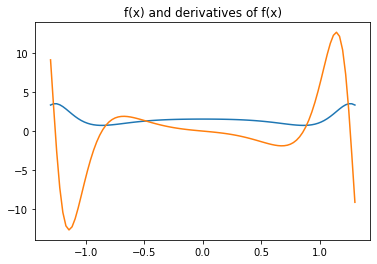

In [35]:
data = np.linspace(-1.3, 1.3, 100)
#print(data)

Ydata = []
DYdata = []

for xdata in data:

    # テンソルを作成
    # requires_grad=Trueで自動微分対象を指定
    x = torch.tensor(xdata, requires_grad=True)

    # 計算グラフを構築
    # y = 
    y = torch.sqrt(x*x + torch.exp(x*x)) + torch.cos(x*x + torch.exp(x*x))

#    print('x=',x, 'y=', y)
    ydum = y.detach().numpy()
#    print('y=', ydum)
    Ydata.append(ydum)

    # 勾配を計算
    y.backward()

    # 勾配を表示
    dydum = x.grad.detach().numpy()
#    print('dy/dx=', dydum)  # dy/dx
    DYdata.append(dydum)
    
#print(np.array(Ydata))
#print(np.array(DYdata))

plt.plot(data, Ydata, label="f(x)")
plt.plot(data, DYdata, label="df(x)/dx")
plt.legend
plt.title("f(x) and derivatives of f(x)")
plt.savefig('autograd.png')
plt.show()